<h1>Exploration with python</h1>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cf
from cartopy.io.img_tiles import OSM
sns.set_theme(style="darkgrid")

In [2]:
path = 'E:/Ciencia de Datos/Geo/Proyecto #1/data/2021-12_SS1TYI_Woerner_data.xls'

In [3]:
#selecciono el path para importarlo con pandas
df = pd.read_excel(path, header=1)
#elimino la primera fila de indice 0
df = df.iloc[0:]
# Reinicia los índices
df.reset_index(drop=True, inplace=True)

In [4]:
df

,Arc,Sample,Location,Geologycal_age,Domain,Sample_type,Rock_type,Geochemistry Reference,Country,Age (Ma),...,143_144Nd,143_144Nd_error,eNd,TDM ages,206_204Pb,206Pb_error,207_204Pb,207Pb_error,208Pb_204Pb,208Pb_error
0,Frontal arc,SAR-00-08,Sara Sara,Quaternary,Paracas,lava,andesite,"Mamani et al., 2008",Peru,1.62,...,0.512468,0.000006,-3.31618,0.899332,18.669539,0.000767,15.669472,0.000695,38.880311,0.001909
1,Frontal arc,SAR-00-07,Sara Sara,Quaternary,Paracas,lava,andesite,"Mamani et al., 2008",Peru,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Frontal arc,SAR-00-13,Sara Sara,Quaternary,Paracas,lava,andesite,"Mamani et al., 2008",Peru,NaN,...,0.512455,0.000004,-3.56977,0.970938,18.667104,0.000767,15.686056,0.000695,38.896523,0.001909
3,Frontal arc,SAR-00-06,Sara Sara,Quaternary,Paracas,ignimbrite,rhyolite,"Mamani et al., 2008",Peru,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Frontal arc,SAR-00-10,Sara Sara,Quaternary,Paracas,ignimbrite,rhyolite,"Mamani et al., 2008",Peru,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1781,Proterozoic,BEL-11,Belen,Proterozoic,Arequipa,metamorphic,gneiss,"Wörner et al., 2000",Chile,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1782,Proterozoic,Uya-05,C° Uyarani,Proterozoic,Arequipa,metamorphic,amphibolite,"Wörner et al., 2000",Bolivia,NaN,...,NaN,NaN,NaN,NaN,20.431000,NaN,15.895000,NaN,39.234000,NaN
1783,Proterozoic,Uya-06,C° Uyarani,Proterozoic,Arequipa,metamorphic,amphibolite,"Wörner et al., 2000",Bolivia,NaN,...,NaN,NaN,NaN,NaN,17.273000,NaN,15.631000,NaN,38.955000,NaN
1784,Proterozoic,Uya-07,C° Uyarani,Proterozoic,Arequipa,metamorphic,amphibolite,"Wörner et al., 2000",Bolivia,NaN,...,NaN,NaN,NaN,NaN,17.275000,NaN,15.557000,NaN,37.380000,NaN


In [5]:
df.describe()

,Age (Ma),Longitude (X),Latitude (Y),SiO2,TiO2,Al2O3,Fe2O3,MnO,MgO,CaO,...,143_144Nd,143_144Nd_error,eNd,TDM ages,206_204Pb,206Pb_error,207_204Pb,207Pb_error,208Pb_204Pb,208Pb_error
count,282.000000,1786.000000,1786.000000,1532.000000,1511.000000,1515.000000,1445.000000,1511.000000,1531.000000,1511.000000,...,629.000000,363.000000,629.000000,499.000000,666.000000,221.000000,666.000000,221.000000,666.000000,216.000000
mean,10.355360,-69.793188,-19.111600,61.585706,0.801225,15.970663,4.792867,0.104258,2.610310,4.855058,...,0.512363,0.007753,-5.359584,1.312001,18.437170,0.001612,15.629480,0.001575,38.712470,0.004203
std,18.928183,1.835050,3.315066,6.349912,0.378244,1.684158,2.371511,0.175889,1.762913,2.399074,...,0.000232,0.031649,4.528120,0.382931,0.645026,0.001699,0.067315,0.001673,0.730453,0.004092
min,0.000009,-76.275000,-29.200000,25.400000,0.030000,5.900000,0.100000,0.000000,0.030000,0.000000,...,0.510937,0.000003,-33.181309,0.472675,16.008000,0.000000,15.435000,0.000302,35.625029,0.000000
25%,0.047425,-71.395160,-21.520833,57.800000,0.573250,15.400000,2.880000,0.069000,1.590000,3.620000,...,0.512244,0.000004,-7.685735,1.082257,18.122183,0.000754,15.600000,0.000695,38.454000,0.001935
50%,3.425000,-69.385667,-18.210732,60.925000,0.804000,16.250000,5.010000,0.087000,2.440000,5.080000,...,0.512366,0.000005,-5.305888,1.250744,18.520000,0.001057,15.623297,0.001177,38.662497,0.003036
75%,13.850000,-68.604573,-16.341042,64.800000,1.040000,16.915000,6.570000,0.110000,3.305000,6.185000,...,0.512476,0.000007,-3.160125,1.455461,18.764139,0.002082,15.654000,0.001965,38.849567,0.005019
max,156.400000,-65.200000,-13.408333,84.060000,3.090000,28.700000,12.600000,6.160000,14.800000,35.090000,...,0.513020,0.174000,7.451652,4.487940,24.280000,0.016780,16.631000,0.014910,49.416618,0.039806


In [6]:
#Separo las coordenadas y la edad
# Seleccionar las tres columnas específicas
columnas_seleccionadas = ['Longitude (X)', 'Latitude (Y)', 'Age  (Ma)', 'Geologycal_age', 'Rock_type']
df_coordenadas = df[columnas_seleccionadas]
df_coordenadas

,Longitude (X),Latitude (Y),Age (Ma),Geologycal_age,Rock_type
0,-73.335833,-15.136111,1.62,Quaternary,andesite
1,-73.347222,-15.199722,NaN,Quaternary,andesite
2,-73.418611,-15.251944,NaN,Quaternary,andesite
3,-73.366111,-15.270556,NaN,Quaternary,rhyolite
4,-73.547500,-15.314444,NaN,Quaternary,rhyolite
...,...,...,...,...,...
1781,-69.516667,-18.483333,NaN,Proterozoic,gneiss
1782,-68.666667,-18.500000,NaN,Proterozoic,amphibolite
1783,-68.666667,-18.500000,NaN,Proterozoic,amphibolite
1784,-68.666667,-18.500000,NaN,Proterozoic,amphibolite


In [7]:
#renombramos las columnas
mapa = {
        'Longitude (X)':'Lon',
        'Latitude (Y)':'Lat',
        'Age  (Ma)':'Age(Ma)',
        'Geologycal_age':'Geologycal_age',
        'Rock_type':'Rock_type'
        }
df_coordenadas = df_coordenadas.rename(columns= mapa)
df_coordenadas

,Lon,Lat,Age(Ma),Geologycal_age,Rock_type
0,-73.335833,-15.136111,1.62,Quaternary,andesite
1,-73.347222,-15.199722,NaN,Quaternary,andesite
2,-73.418611,-15.251944,NaN,Quaternary,andesite
3,-73.366111,-15.270556,NaN,Quaternary,rhyolite
4,-73.547500,-15.314444,NaN,Quaternary,rhyolite
...,...,...,...,...,...
1781,-69.516667,-18.483333,NaN,Proterozoic,gneiss
1782,-68.666667,-18.500000,NaN,Proterozoic,amphibolite
1783,-68.666667,-18.500000,NaN,Proterozoic,amphibolite
1784,-68.666667,-18.500000,NaN,Proterozoic,amphibolite


c:\Users\neybe\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\neybe\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\neybe\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Boxplots Geological age')

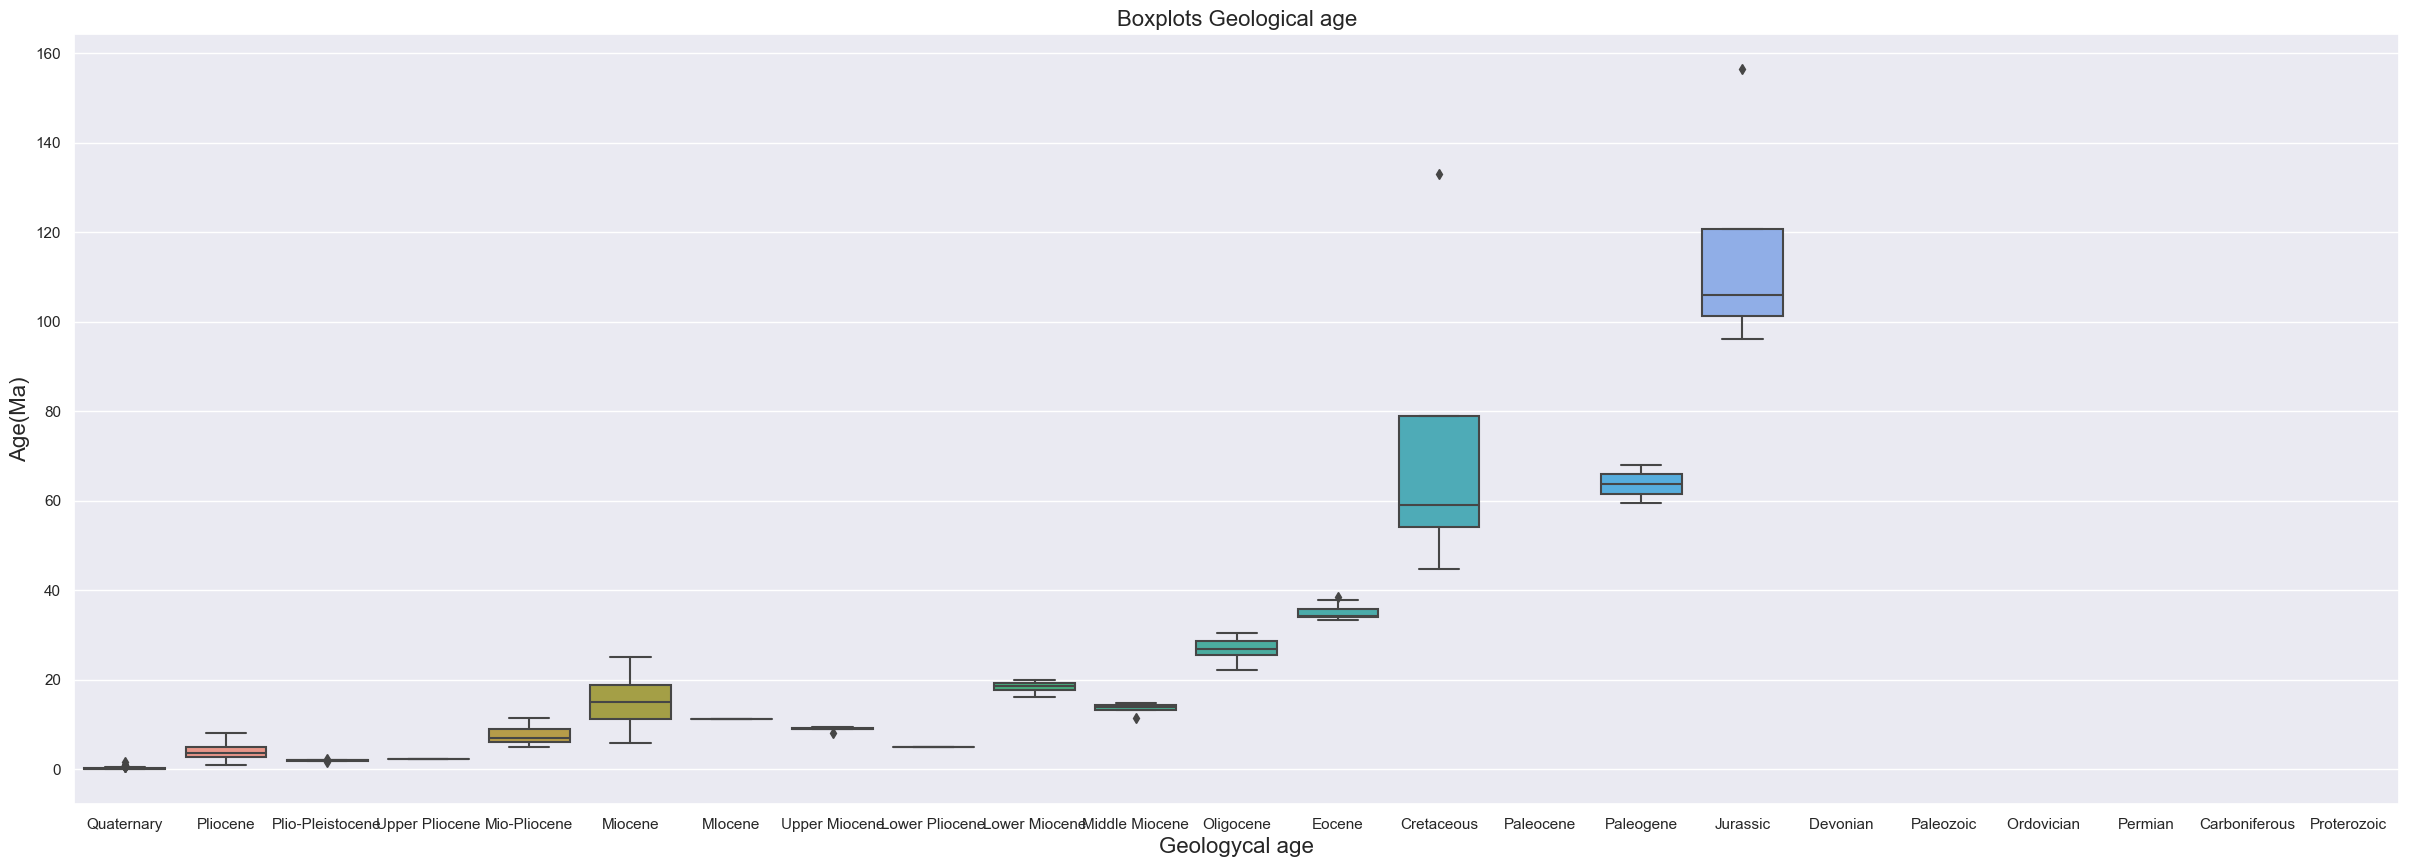

In [8]:
fig, ax = plt.subplots(figsize = (30, 10))
sns.boxplot(x= 'Geologycal_age', y= 'Age(Ma)',data = df_coordenadas, ax = ax)
plt.xlabel("Geologycal age",fontsize=16)
plt.ylabel("Age(Ma)",fontsize=16)
plt.title("Boxplots Geological age", fontsize=16)

c:\Users\neybe\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\neybe\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\neybe\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180.]),
 [Text(0, -20.0, '−20'),
  Text(0, 0.0, '0'),
  Text(0, 20.0, '20'),
  Text(0, 40.0, '40'),
  Text(0, 60.0, '60'),
  Text(0, 80.0, '80'),
  Text(0, 100.0, '100'),
  Text(0, 120.0, '120'),
  Text(0, 140.0, '140'),
  Text(0, 160.0, '160'),
  Text(0, 180.0, '180')])

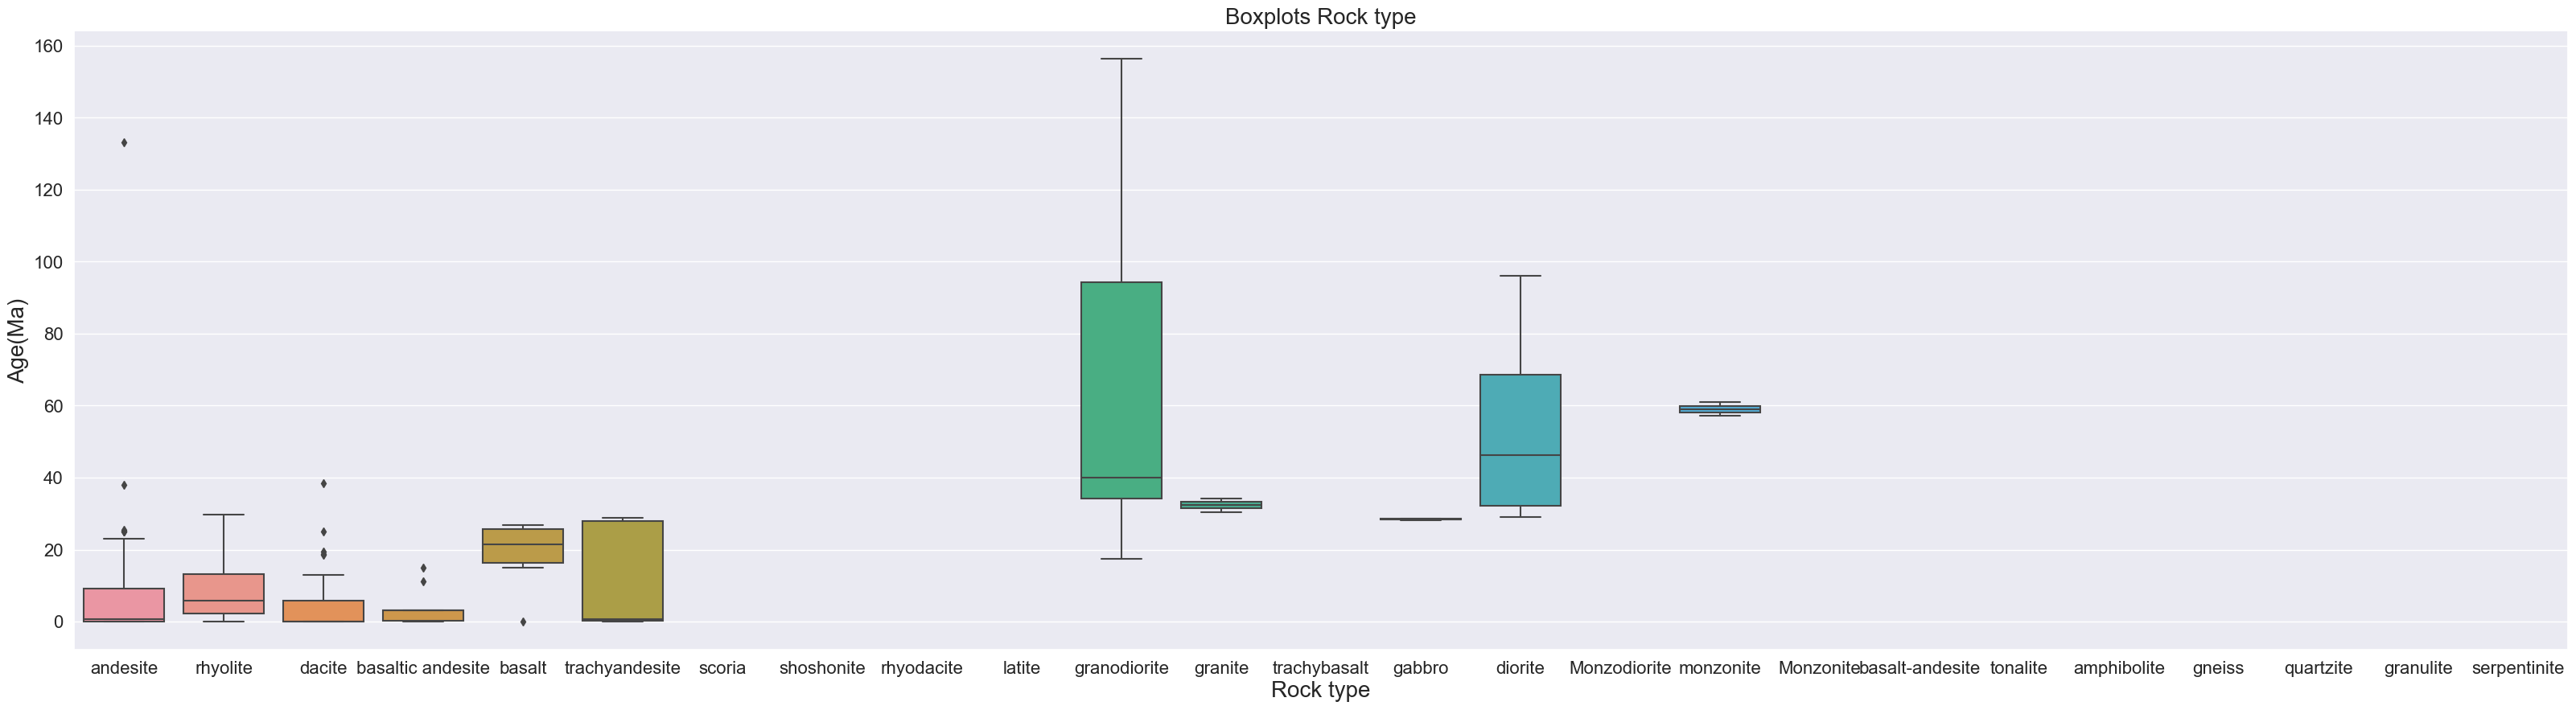

In [9]:
fig, ax = plt.subplots(figsize = (40, 10))
sns.boxplot(x= 'Rock_type', y= 'Age(Ma)',data = df_coordenadas, ax = ax)
plt.xlabel("Rock type",fontsize=20)
plt.ylabel("Age(Ma)",fontsize=20)
plt.title("Boxplots Rock type", fontsize=20)
plt.xticks(fontsize=16)  # Tamaño de letra en las etiquetas del eje x
plt.yticks(fontsize=16) # Tamaño de letra en las etiquetas del eje y

In [10]:
px.box(df_coordenadas, x= 'Rock_type', y= 'Age(Ma)')

In [14]:
px.box(df_coordenadas, x= 'Geologycal_age', y= 'Age(Ma)')

In [11]:
"""lat = df_coordenadas["Lat"]
lon = df_coordenadas["Lon"]
X, Y = np.meshgrid(lon, lat)
imagery = OSM()

# Crea una figura y ejes con la proyección de latitud y longitud
fig, ax = plt.subplots(1, figsize=(8, 6), subplot_kw={'projection': ccrs.PlateCarree()})
loc = ticker.MultipleLocator(4)

# Agrega el mapa base (costas, límites de países, etc.)
ax.add_feature(cf.COASTLINE)
ax.add_feature(cf.BORDERS)

plt.scatter(lon, lat, color='red', marker='.', s=50)
ax.set(ylim=(lat.min(), lat.max()), xlim=(lon.min(), lon.max()))                                                           
ax.gridlines(draw_labels={"bottom": "x", "left": "y"}, xlocs=loc, ylocs=loc)
ax.add_image(imagery, 14)

# Muestra el mapa
plt.title("Puntos de muestreo")
plt.show()"""

'lat = df_coordenadas["Lat"]\nlon = df_coordenadas["Lon"]\nX, Y = np.meshgrid(lon, lat)\nimagery = OSM()\n\n# Crea una figura y ejes con la proyección de latitud y longitud\nfig, ax = plt.subplots(1, figsize=(8, 6), subplot_kw={\'projection\': ccrs.PlateCarree()})\nloc = ticker.MultipleLocator(4)\n\n# Agrega el mapa base (costas, límites de países, etc.)\nax.add_feature(cf.COASTLINE)\nax.add_feature(cf.BORDERS)\n\nplt.scatter(lon, lat, color=\'red\', marker=\'.\', s=50)\nax.set(ylim=(lat.min(), lat.max()), xlim=(lon.min(), lon.max()))                                                           \nax.gridlines(draw_labels={"bottom": "x", "left": "y"}, xlocs=loc, ylocs=loc)\nax.add_image(imagery, 14)\n\n# Muestra el mapa\nplt.title("Puntos de muestreo")\nplt.show()'

In [12]:
#sns.pairplot(df, kind = 'reg', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.5}})